## Load the dataset 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel('MaterialsSample_May13UPDATED.xlsx') 

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(df)

       mat_skey         mat_id  div  lvl1  lvl2  lvl3  lvl4  \
0        123071  M011131500500    1    11    31    50   500   
1        123072  M011131500510    1    11    31    50   510   
2         57298  M011131750020    1    11    31    75    20   
3         57299  M011131750050    1    11    31    75    50   
4         57300  M011131750100    1    11    31    75   100   
5         57301  M011131751000    1    11    31    75  1000   
6         57302  M011131751100    1    11    31    75  1100   
7         57303  M011131752000    1    11    31    75  2000   
8         57304  M011131752100    1    11    31    75  2100   
9         57305  M011131753000    1    11    31    75  3000   
10        57306  M011131753100    1    11    31    75  3100   
11        57307  M013233500010    1    32    33    50    10   
12        57308  M013233500100    1    32    33    50   100   
13        57309  M013233500200    1    32    33    50   200   
14        57310  M013233500300    1    32    33    50  

In [3]:
df3=pd.read_excel('MaterialsSample_May13UPDATED.xlsx',sheet_name='Classification')
df3

,Code,Description
0,1,General Requirements
1,2,Existing Conditions
2,3,Concrete
3,4,Masonry
4,5,Metals
5,6,"Wood, Plastics, and Composites"
6,7,Thermal and Moisture Protection
7,8,Openings
8,9,Finishes
9,10,Specialties


In [4]:
df_dict = dict(zip(df3.Code, df3.Description))
print(df_dict.keys())

dict_keys([9912320, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 9912335, 311313, 9912339, 9912340, 21, 22, 23, 9912344, 25, 26, 27, 28, 26051930, 31, 32, 33, 34, 35, 221221, 221223, 1761320, 41, 9912362, 44, 237613, 46, 11531613, 48, 344113, 131123, 9912372, 23721310, 9912374, 9912375, 90170, 26051935, 35202313, 23052350, 11731010, 262213, 262216, 131146, 11731020, 7135310, 9912333, 23052370, 26561655, 13050595, 5513313, 5513316, 23052390, 23052394, 5513323, 98413, 111, 22421616, 311413, 6152310, 75113, 213113, 213116, 114813, 13492350, 22421634, 131, 132, 23212054, 2753, 22421640, 221323, 131213, 221326, 145, 35015010, 26051950, 151, 152, 154, 155, 156, 23212058, 158, 31131310, 79216, 166, 57513, 171, 174, 176, 6521010, 221363, 12361910, 1712313, 6521020, 1712319, 193, 26053323, 6521030, 11141319, 14213320, 31621323, 12591310, 6521040, 35411320, 14918210, 10141910, 9634010, 221, 87419, 9634020, 7912610, 232, 16619, 221423, 241, 242, 243, 221429, 7921910, 131113, 344313, 23052330, 7

In [5]:
l=[]
for i in df['div']:
    if(i in df_dict):
        l.append(df_dict[i])
print(len(l))
df['Class_Name']=l
df

53555


,mat_skey,mat_id,div,lvl1,lvl2,lvl3,lvl4,tech_desc,UOM,Class_Name
0,123071,M011131500500,1,11,31,50,500,"Models, 2 story, scaled 100' x 200', simple ma...",Ea.,General Requirements
1,123072,M011131500510,1,11,31,50,510,"Models, 2 story, scaled 100' x 200', elaborate...",Ea.,General Requirements
2,57298,M011131750020,1,11,31,75,20,"Rendering, color matted, 20"" x 30"", eye level,...",Ea.,General Requirements
3,57299,M011131750050,1,11,31,75,50,"Rendering, color matted, 20"" x 30"", eye level,...",Ea.,General Requirements
4,57300,M011131750100,1,11,31,75,100,"Rendering, color matted, 20"" x 30"", eye level,...",Ea.,General Requirements
5,57301,M011131751000,1,11,31,75,1000,"Rendering, color matted, 20"" x 30"", eye level,...",Ea.,General Requirements
6,57302,M011131751100,1,11,31,75,1100,"Rendering, color matted, 20"" x 30"", eye level,...",Ea.,General Requirements
7,57303,M011131752000,1,11,31,75,2000,"Rendering, color, aerial perspective, 1 buildi...",Ea.,General Requirements
8,57304,M011131752100,1,11,31,75,2100,"Rendering, color, aerial perspective, 1 buildi...",Ea.,General Requirements
9,57305,M011131753000,1,11,31,75,3000,"Rendering, color, aerial perspective, 5 buildi...",Ea.,General Requirements


## Data Preparation

In [6]:
X = df['tech_desc']
Y_values = df['div']
Y_set = list(set(Y_values))

Y = Y_values

# classify_classes = list(set(Y))
# class_count=len(classify_classes)
# class_count

In [7]:
X,Y

(0        Models, 2 story, scaled 100' x 200', simple ma...
 1        Models, 2 story, scaled 100' x 200', elaborate...
 2        Rendering, color matted, 20" x 30", eye level,...
 3        Rendering, color matted, 20" x 30", eye level,...
 4        Rendering, color matted, 20" x 30", eye level,...
 5        Rendering, color matted, 20" x 30", eye level,...
 6        Rendering, color matted, 20" x 30", eye level,...
 7        Rendering, color, aerial perspective, 1 buildi...
 8        Rendering, color, aerial perspective, 1 buildi...
 9        Rendering, color, aerial perspective, 5 buildi...
 10       Rendering, color, aerial perspective, 5 buildi...
 11       Photographs, 8" x 10", 4 shots, 2 prints each,...
 12       Photographs, 8" x 10", 4 shots, 2 prints each,...
 13       Photographs, 8" x 10", 4 shots, 2 prints each,...
 14                        Photographs, for I.D. slugs, add
 15       Photographs, aerial photos, fly-over, 5 shots,...
 16       Photographs, aerial photos, fl

In [8]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [9]:
#Y = df['div'].apply(str)
Y=df['Class_Name']
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
#convert integers to dummy variables 
dummy_y = np_utils.to_categorical(encoded_Y)

In [10]:
dummy_y.shape

(53555, 30)

In [11]:
print(encoded_Y[1500:1800])

[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 16
 16 16 16 16 16 16 16 16 16 16 16 16]


## Summary Statistics

In [12]:
df.describe(include='all')

,mat_skey,mat_id,div,lvl1,lvl2,lvl3,lvl4,tech_desc,UOM,Class_Name
count,53555.000000,53555,53555.000000,53555.000000,53555.000000,53555.000000,53555.000000,53555,53555,53555
unique,NaN,53555,NaN,NaN,NaN,NaN,NaN,53000,96,30
top,NaN,M221316202220,NaN,NaN,NaN,NaN,NaN,"Wood construction connectors, 4"" x 8""",Ea.,Electrical
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,8,40558,10509
mean,94154.723238,NaN,20.451536,34.654131,21.001718,27.441135,3328.376006,NaN,NaN,NaN
std,19288.615514,NaN,9.321348,27.283585,12.410036,20.781483,2653.479001,NaN,NaN,NaN
min,57276.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,77826.500000,NaN,11.000000,11.000000,13.000000,10.000000,1040.000000,NaN,NaN,NaN
50%,95159.000000,NaN,23.000000,27.000000,16.000000,20.000000,2780.000000,NaN,NaN,NaN
75%,110312.500000,NaN,26.000000,52.000000,23.000000,40.000000,5190.000000,NaN,NaN,NaN


## Visualization

In [13]:
def classcount_viz():
    %matplotlib inline
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,5))
    df['div'].value_counts().plot(kind="bar", rot=0,width=0.8)
    plt.title('Count Frequencies of Classes in the Samples Materials_May13')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Classes', fontsize=12)
    return plt.show()

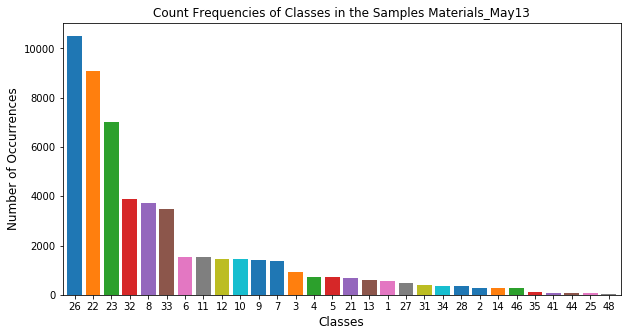

In [14]:
classcount_viz()

## Tokenization

In [15]:
def get_tokens(sentence):
    import nltk
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))
    from tokenize import tokenize

    tokens = nltk.word_tokenize(sentence)
#     tokens = [token for token in tokens if (token not in stopwords and len(token) > 1 ) and token.isalpha()==True]
    tokens = [token for token in tokens if (token not in stopwords and token.isalnum()==True) ] 
    return tokens

In [16]:
def get_token_string(sentance):
    token_list = get_tokens(sentance)
    token_only_string = ' '.join(word for word in token_list)        
    return (token_only_string)

In [17]:
def tokenstring_concat():
    df['tech_desc']=df['tech_desc'].str.lower()
    token_list = (df['tech_desc'].apply(get_token_string))
    X_tkn = token_list
    return X_tkn

In [18]:
token_l=list(df['tech_desc'].apply(get_tokens))
X = tokenstring_concat()
X

0        models 2 story scaled 100 x 200 simple materia...
1        models 2 story scaled 100 x 200 elaborate mate...
2        rendering color matted 20 x 30 eye level 1 bui...
3        rendering color matted 20 x 30 eye level 1 bui...
4        rendering color matted 20 x 30 eye level 1 bui...
5        rendering color matted 20 x 30 eye level 5 bui...
6        rendering color matted 20 x 30 eye level 5 bui...
7        rendering color aerial perspective 1 building ...
8        rendering color aerial perspective 1 building ...
9        rendering color aerial perspective 5 buildings...
10       rendering color aerial perspective 5 buildings...
11       photographs 8 x 10 4 shots 2 prints standard m...
12       photographs 8 x 10 4 shots 2 prints hinged lin...
13               photographs 8 x 10 4 shots 2 prints color
14                                   photographs slugs add
15        photographs aerial photos 5 shots digital images
16       photographs aerial photos 10 shots digital ima.

In [19]:
i=0
j=0
vocab_list=[]#all tokens
vocab=[]# vocabulary
for i in token_l:
    for j in i:
        vocab_list.append(j)
vocab=set(vocab_list)
print(vocab)
print(len(vocab))

{'HDPE', '28X38X2', 'TAP', 'Cooking', 'controller', 'PETROLEUM', 'RETAINER40GAL', 'Cost', 'Or', 'Maidenhair', 'EVAPCOOL', 'tubes', 'Glossy', '922MBH', 'S10', '100GPM', 'bar', 'ltg', '528', 'LAM', 'section', 'rubber', 'adaptor', 'GLZ', 'PLATFORM', 'INSWNG', 'prfile', '23435MBH', 'rebuild', 'exit', 'terne', 'SLH', 'JACKET', 'cube', '30MCFM', 'optic', 'yoke', 'DRAIN', 'flooding', 'Surgical', 'RELAY', 'Condensate', 'special', 'Diameter', 'Corner', 'RJ11', 'Liberty', 'Strap', 'basic', 'incubator', 'trash', 'ftngs', 'Rol', 'brng', 'twinaxial', 'slots', 'trans', 'ld', 'SAVER', 'DRANIERS', 'Induction', 'pusg', 'covers', 'Way', 'KEYWAY', 'BUMPER', 'Mirrored', 'TENNIS', 'lockwashers', 'IPS', 'FEEDER', 'frontal', 'File', 'bays', 'Conehead', 'x14', 'SYP', 'Maltese', 'Goldenrod', '28X16', '101', 'charging', 'iso', 'Stow', 'protect', 'POLYETHYLENE', 'Primer', 'PLN', 'homogeneous', 'PE', 'Buttonwood', '75MBH', '54000', 'splitters', 'mag', 'PAR46', 'grains', 'Kawneer', 'GROS3000MBH', 'PIPING', 'NONFUS

In [43]:
import nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from nltk import pos_tag, ne_chunk 
from nltk.chunk import conlltags2tree, tree2conlltags

ne_tree = ne_chunk(pos_tag(vocab))
ner_count=[]
iob_tagged = tree2conlltags(ne_tree)
#print(iob_tagged)

for word, pos, ner in iob_tagged:
    #print(word, pos, ner)
    #print(ner)
    ner_count.append(ner)
ne_tree = conlltags2tree(iob_tagged)
print(iob_tagged)
ner_count=len(ner_count)
ner_count

[('HDPE', '$', 'O'), ('28X38X2', 'CD', 'O'), ('TAP', 'NNP', 'B-ORGANIZATION'), ('Cooking', 'NNP', 'I-ORGANIZATION'), ('controller', 'NN', 'O'), ('PETROLEUM', 'NNP', 'B-ORGANIZATION'), ('RETAINER40GAL', 'NNP', 'O'), ('Cost', 'NNP', 'O'), ('Or', 'NNP', 'O'), ('Maidenhair', 'NNP', 'O'), ('EVAPCOOL', 'NNP', 'O'), ('tubes', 'VBD', 'O'), ('Glossy', 'NNP', 'O'), ('922MBH', 'CD', 'O'), ('S10', 'NNP', 'O'), ('100GPM', 'CD', 'O'), ('bar', 'NN', 'O'), ('ltg', 'NN', 'O'), ('528', 'CD', 'O'), ('LAM', 'NNP', 'B-ORGANIZATION'), ('section', 'NN', 'O'), ('rubber', 'NN', 'O'), ('adaptor', 'NN', 'O'), ('GLZ', 'NNP', 'B-ORGANIZATION'), ('PLATFORM', 'NNP', 'O'), ('INSWNG', 'NNP', 'O'), ('prfile', 'IN', 'O'), ('23435MBH', 'CD', 'O'), ('rebuild', 'JJ', 'O'), ('exit', 'NN', 'O'), ('terne', 'JJ', 'O'), ('SLH', 'NNP', 'B-ORGANIZATION'), ('JACKET', 'NNP', 'O'), ('cube', 'VBD', 'O'), ('30MCFM', 'CD', 'O'), ('optic', 'JJ', 'O'), ('yoke', 'NN', 'O'), ('DRAIN', 'NNP', 'O'), ('flooding', 'VBG', 'O'), ('Surgical', 'JJ

15427

## Print random train samples

In [31]:
def print_train_data(index):
    print("\nTrain sample")
    print('\ndescription : {0}, DIV : {1}'.format(df['tech_desc'][index], df['div'][index]))
    print(X[index],Y[index])
    print(dummy_y[index])   
    
print_train_data(150)
print_train_data(1500)
print_train_data(15000)


Train sample

description : scaffolding, steel tubular, buy, accessories, walk-thru frame guardrail, DIV : 1
scaffolding steel tubular buy accessories frame guardrail General Requirements
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

Train sample

description : rebar splice, weldable half-coupler, taper threaded, #4 bars, DIV : 3
rebar splice weldable taper threaded 4 bars Concrete
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

Train sample

description : furniture, hotel, standard quality set, minimum, DIV : 12
furniture hotel standard quality set minimum Furnishings
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Padding Sentences

In [ ]:
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import Tokenizer 
# from keras.layers import Embedding, LSTM, Dense, Dropout
# from keras.preprocessing.text import Tokenizer
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# import keras.utils as ku 

# def space_padded(sequences):
#     format_string = '{: <' + str(max_len) + '}'
#     padded_sequences = format_string.format(sequences)
#     return padded_sequences
# sequences=list(df['tech_desc'])
# max_len = max([len(x) for x in sequences])
# padded_messages = []
# for i in sequences:
#     padded_messages.append(space_padded(i))
# padded_messages

# Model Creation

In [45]:
!pip3 install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-5ftsxipt
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-5ftsxipt
  Stored in directory: /tmp/pip-ephem-wheel-cache-4tlmlgv2/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [46]:
import tensorflow_hub as hub
from keras.models import Model
from keras import backend as K
from keras import layers as layers
from scipy import spatial
from keras_contrib.layers import CRF
    
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [47]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

####  To build the architecture, high level keras api is used as it is easier to use. 

####  The functional approach to build a simple feed- forward neural network along with regularization to avoid over-fitting.

In [58]:
def build_model(): 
    input_text = layers.Input(shape=(1,), dtype="string")
    embedding =  layers.Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
    #dense = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)) (embedding)
    dense = layers.Dense(dummy_y.shape[1], activation='softmax')(embedding) 
    crf = CRF(ner_count)  # CRF layer
    out = crf(dense)  # output
    #pred = layers.Dense(dummy_y.shape[1], activation='softmax')(dense)        
    model = Model(inputs=[input_text], outputs=out)
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])
    return model


## Model Summary

In [59]:
model_elmo = build_model()
model_elmo.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0604 05:38:18.538900 140468116670208 saver.py:1483] Saver not created because there are no variables in the graph to restore


ValueError: Index out of range using input dim 2; input has only 2 dims for 'crf_6/strided_slice' (op: 'StridedSlice') with input shapes: [?,15427], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.

## Building the Model

#### The model architecture (compiled) and data both are ready, it is time to start training and saving the trained weights.

In [36]:
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    history = model_elmo.fit(X,dummy_y, epochs=5, batch_size=32, validation_split = 0.2)
    model_elmo.save_weights('./model_elmo_15_dummy_y.h5')

Instructions for updating:
Use tf.cast instead.


W0603 06:37:13.350831 140276124034816 deprecation.py:323] From /anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 42844 samples, validate on 10711 samples
Epoch 1/5
42844/42844 [==============================] - 253s 6ms/step - loss: 1.0768 - acc: 0.7606 - val_loss: 12.2550 - val_acc: 0.0400
Epoch 2/5
42844/42844 [==============================] - 253s 6ms/step - loss: 0.7205 - acc: 0.8565 - val_loss: 13.4090 - val_acc: 0.0293
Epoch 3/5
42844/42844 [==============================] - 253s 6ms/step - loss: 0.6316 - acc: 0.8833 - val_loss: 14.3704 - val_acc: 0.0267
Epoch 4/5
42844/42844 [==============================] - 252s 6ms/step - loss: 0.5826 - acc: 0.8968 - val_loss: 14.3778 - val_acc: 0.0210
Epoch 5/5
42844/42844 [==============================] - 253s 6ms/step - loss: 0.5527 - acc: 0.9052 - val_loss: 14.5092 - val_acc: 0.0391


In [37]:
def accuracy_plot():
    import matplotlib.pyplot as plt
    %matplotlib inline

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'g', label='Training Acc')
    # plt.plot(epochs, val_acc, 'b', label='Validation Acc')
    plt.plot(epochs,loss,'r',label='Loss')
    plt.title('Training and validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    return plt.show()

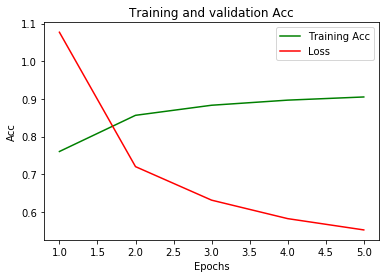

In [38]:
accuracy_plot()

## Prediction with the trained model

In [39]:
def list_to_lower(string_list):
    low_list =[x.lower() for x in string_list]
    return low_list

In [40]:
model_path = './model_elmo_15_dummy_y.h5'

def predict_div(str_list):
    with tf.Session() as session:
        K.set_session(session)
        session.run(tf.global_variables_initializer())  
        session.run(tf.tables_initializer())
        model_elmo = build_model() 
        model_elmo.load_weights(model_path)
    
        import time
        t = time.time()
        predicts = model_elmo.predict(str_list)
        print("time: ", time.time() - t)
        return predicts

In [41]:
def formattedText(float_num):
    return "{0:.4f}".format(float_num)

def print_predictions(str_list, predictions_list):
    df4=pd.DataFrame()    
    
    distinct_classes = list(range(0, len(Y_set)))
    df4['Class_idx'] = encoder.inverse_transform(distinct_classes)
    max_pred = []
    for i in range(len(str_list)):
        prob_val_label = "Prob_val_{0}".format(i+1)
        prob_val_text_label = "Prob_val_text_{0}".format(i+1)
        df4[prob_val_label] = predictions_list[i]
        df4[prob_val_text_label] = df4[prob_val_label].apply(formattedText)
        max_p = df4[prob_val_label].max(axis=0)
        max_index = df4[prob_val_label].idxmax()
        class_val = encoder.inverse_transform([max_index])[0]
        max_pred.append(max_p)
        print("Text {0}: {1}\n pred_class - {2}, \n pred_index - {3}, \n Max_Probablility - {4}\n".format(i+1,new_text_pr[i], class_val, max_index, max_p))   
        
    df4 = df4.sort_values(by=['Class_idx'])
    return df4

In [42]:
def set_inputs():
    new_text =  [df['tech_desc'][163],
                 df['tech_desc'][32150],
                 df['tech_desc'][3210],
                 'Unrecognized data']
    # Standardising Inputs
    new_text = list_to_lower(new_text) 
    new_text_pr = np.array(new_text, dtype=object)[:, np.newaxis]
    return new_text_pr

In [43]:
new_text_pr = set_inputs()
predicts = predict_div(new_text_pr)
predict_results = print_predictions(new_text_pr, predicts)
predict_results

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0603 07:12:19.066318 140276124034816 saver.py:1483] Saver not created because there are no variables in the graph to restore


time:  0.6192774772644043
Text 1: ['scaff, steel tubular, rent/mo, stairway section incl. rails & starter bar']
 pred_class - Electrical, 
 pred_index - 5, 
 Max_Probablility - 0.5286580920219421

Text 2: ['makeupair roof ss ex 550 mbh output']
 pred_class - Heating, Ventilating, and Air Conditioning (HVAC), 
 pred_index - 15, 
 Max_Probablility - 0.9809607267379761

Text 3: ['stair, steel spiral, galvanized, 4\'-0" dia, checkered platel tread']
 pred_class - Metals, 
 pred_index - 18, 
 Max_Probablility - 0.7037344574928284

Text 4: ['unrecognized data']
 pred_class - Equipment, 
 pred_index - 8, 
 Max_Probablility - 0.37471890449523926



,Class_idx,Prob_val_1,Prob_val_text_1,Prob_val_2,Prob_val_text_2,Prob_val_3,Prob_val_text_3,Prob_val_4,Prob_val_text_4
0,Class Unknown,1.393785e-04,0.0001,8.442767e-05,0.0001,1.157865e-08,0.0000,0.003690,0.0037
1,Communications,7.446476e-07,0.0000,1.302246e-08,0.0000,2.524624e-08,0.0000,0.000007,0.0000
2,Concrete,9.396891e-04,0.0009,3.794481e-06,0.0000,1.233275e-04,0.0001,0.000069,0.0001
3,Conveying Equipment,7.485487e-03,0.0075,1.492569e-05,0.0000,9.881514e-06,0.0000,0.000828,0.0008
4,Earthwork,4.745128e-07,0.0000,7.172303e-09,0.0000,8.553878e-09,0.0000,0.000008,0.0000
5,Electrical,5.286581e-01,0.5287,6.921879e-04,0.0007,9.423892e-04,0.0009,0.182746,0.1827
6,Electrical Power Generation,1.527917e-06,0.0000,1.444133e-08,0.0000,5.419453e-08,0.0000,0.000010,0.0000
7,Electronic Safety and Security,1.745278e-06,0.0000,9.822542e-09,0.0000,8.682391e-08,0.0000,0.000014,0.0000
8,Equipment,6.038452e-02,0.0604,3.087108e-04,0.0003,9.925281e-06,0.0000,0.374719,0.3747
9,Existing Conditions,1.027066e-03,0.0010,7.528056e-06,0.0000,2.419236e-06,0.0000,0.238703,0.2387


In [44]:
predict_results.sort_values(by=['Prob_val_text_2'])

,Class_idx,Prob_val_1,Prob_val_text_1,Prob_val_2,Prob_val_text_2,Prob_val_3,Prob_val_text_3,Prob_val_4,Prob_val_text_4
29,"Wood, Plastics, and Composites",5.009085e-02,0.0501,2.465903e-05,0.0000,1.421264e-02,0.0142,0.007879,0.0079
21,Pollution and Waste Control Equipment,9.334620e-07,0.0000,2.204843e-08,0.0000,3.612070e-08,0.0000,0.000010,0.0000
28,Waterway and Marine Construction,1.206664e-06,0.0000,1.170173e-08,0.0000,1.764231e-08,0.0000,0.000011,0.0000
13,Furnishings,3.695217e-02,0.0370,1.005254e-05,0.0000,6.365060e-04,0.0006,0.029153,0.0292
12,Fire Suppression,7.193561e-05,0.0001,3.251155e-06,0.0000,2.606126e-04,0.0003,0.000376,0.0004
25,Transportation,6.610791e-07,0.0000,1.595883e-08,0.0000,2.201588e-08,0.0000,0.000007,0.0000
10,Exterior Improvements,5.116433e-07,0.0000,7.545769e-09,0.0000,1.252197e-08,0.0000,0.000006,0.0000
9,Existing Conditions,1.027066e-03,0.0010,7.528056e-06,0.0000,2.419236e-06,0.0000,0.238703,0.2387
26,Utilities,6.759002e-07,0.0000,1.325110e-08,0.0000,4.655822e-08,0.0000,0.000006,0.0000
7,Electronic Safety and Security,1.745278e-06,0.0000,9.822542e-09,0.0000,8.682391e-08,0.0000,0.000014,0.0000


In [45]:
print_train_data(3210)


Train sample

description : stair, steel spiral, galvanized, 4'-0" dia, checkered platel tread, DIV : 5
stair steel spiral galvanized dia checkered platel tread Metals
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [46]:
encoder.inverse_transform([9, 8])

array(['Existing Conditions', 'Equipment'], dtype=object)